# What's the Weather Like?

## Analysis
#### Observed Trend 1: It is hotter at the equator; however, the northern hemisphere is currently warmer than the southern hemisphere

#### Observed Trend 2: The northern hemisphere appears to have some of the coldest temperatures as well which may be due in part to a higher concentration. More cities with greater temperature diversity.

#### Observed Trend 3: Humidity, Cloudiness, and Wind Speed are uniform across the northern and southern hemispheres. Humidity is high, wind is low and cloudiness is evenly dispersed across the board. 


In [21]:
# Dependencies

from citipy import citipy
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import random
import time
import matplotlib.pyplot as plt
import datetime
import csv
import os

In [22]:
# Save config information.
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb" #Amed's key
api_key = "924783bda048569443e49dd6a03e5591"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit 

# Generate Cities List

In [23]:
# grab random coordinates an find the closest cities
sample_size = 100

coordinates = [((random.randint(-90, 90)),(random.randint(-180, 180))) for _ in range (sample_size)]

city_list = []

cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    city_names = citipy.nearest_city(lat, lon).city_name

#create a list of random cities    
    city_list.append(city_names)

#city_list 

# Perform API Calls

In [24]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature

city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

counter = 0

#clear/ prep csv file for query log
output_path = os.path.join("Weather_Query_log")
with open(output_path, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')

for city in city_list:
    
    try:
        print("----------------------")
        print("Now logging city # " + str(counter))
        print(query_url + city)
        response = req.get(query_url + city).json()
        
        # Specify the file to write to
        output_path = os.path.join("Weather_Query_log")

        # Open the file using "write" mode. Specify the variable to hold the contents
        with open(output_path, 'a', newline='') as csvfile:

            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')

            # Write the first row (column headers)
            csvwriter.writerow(['----------------------'])
            csvwriter.writerow(["Now logging city # " + str(counter)])
            csvwriter.writerow([query_url + city]) 

            
        city_data.append(response.get("name"))
        cloudiness_data.append(response.get("clouds").get("all"))
        country_data.append(response.get("sys").get("country"))
        date_data.append(response.get("dt"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        max_temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))

        counter = counter + 1
        if counter % 59 == 0:
            time.sleep(60)
    except:
        print("Skipping this...")

weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

weather_data = pd.DataFrame(weather_data)

date_stamp = str(weather_data.iloc[0,3])

date_stamp = datetime.datetime.fromtimestamp(int(date_stamp)).strftime('%m-%d-%Y')

weather_data.count()

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hilo
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bowen
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=georgetown
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=cherskiy
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=puerto ayora
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=upernavik
----------------------
Now logging city # 6
http://api.openweath

----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=amderma
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=puerto ayora
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=inndyr
----------------------
Now logging city # 56
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=sinnamary
----------------------
Now logging city # 57
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=vardo
----------------------
Now logging city # 58
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=ribeira grande
----------------------
Now logging city # 59
http://a

City          100
Cloudiness    100
Country       100
Date          100
Humidity      100
Lat           100
Lng           100
Max Temp      100
Wind Speed    100
dtype: int64

In [25]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1509120300,88,19.73,-155.09,73.4,9.17
1,Bowen,0,AU,1509116400,88,-20.02,148.23,69.8,4.70
2,Georgetown,75,GY,1509116400,59,6.80,-58.16,91.4,9.17
3,Cherskiy,44,RU,1509121536,67,68.75,161.30,-9.4,2.37
4,Puerto Ayora,75,EC,1509120000,69,-0.74,-90.35,73.4,16.11


# Latitude vs Temperature Plot

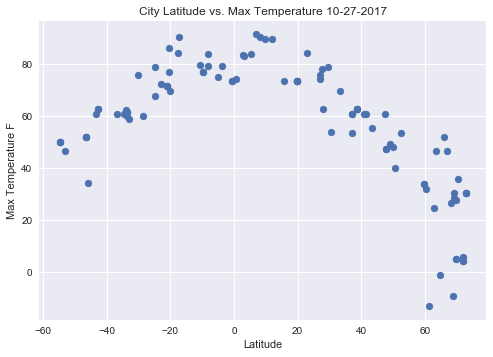

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Max Temperature F")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

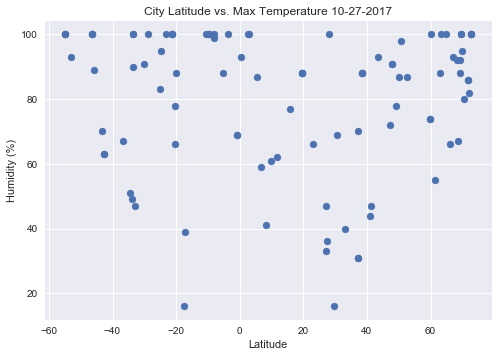

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

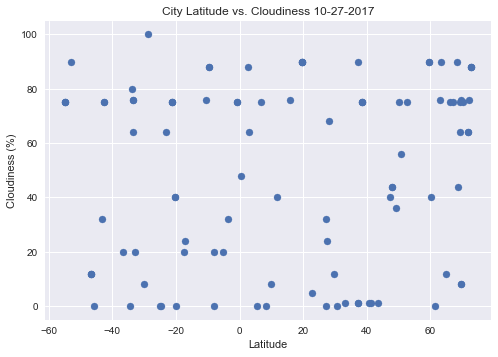

In [28]:
# Build a scatter plot for atitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " " + date_stamp)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

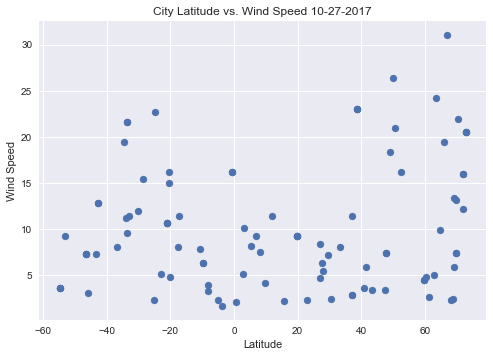

In [29]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " " + date_stamp)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

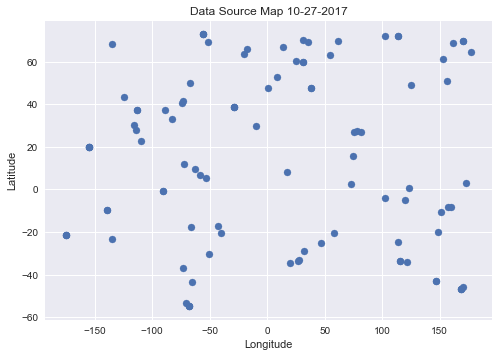

In [30]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lng"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Data Source Map" + " " + date_stamp)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("Data Source Map.png")

# Show plot
plt.show()